In [331]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

import warnings
warnings.filterwarnings('ignore')

In [332]:
# Veri setini yükleme
cancer = load_breast_cancer()

df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [333]:
df.shape

(569, 31)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [335]:
df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


*  Veri boş değer içermiyor

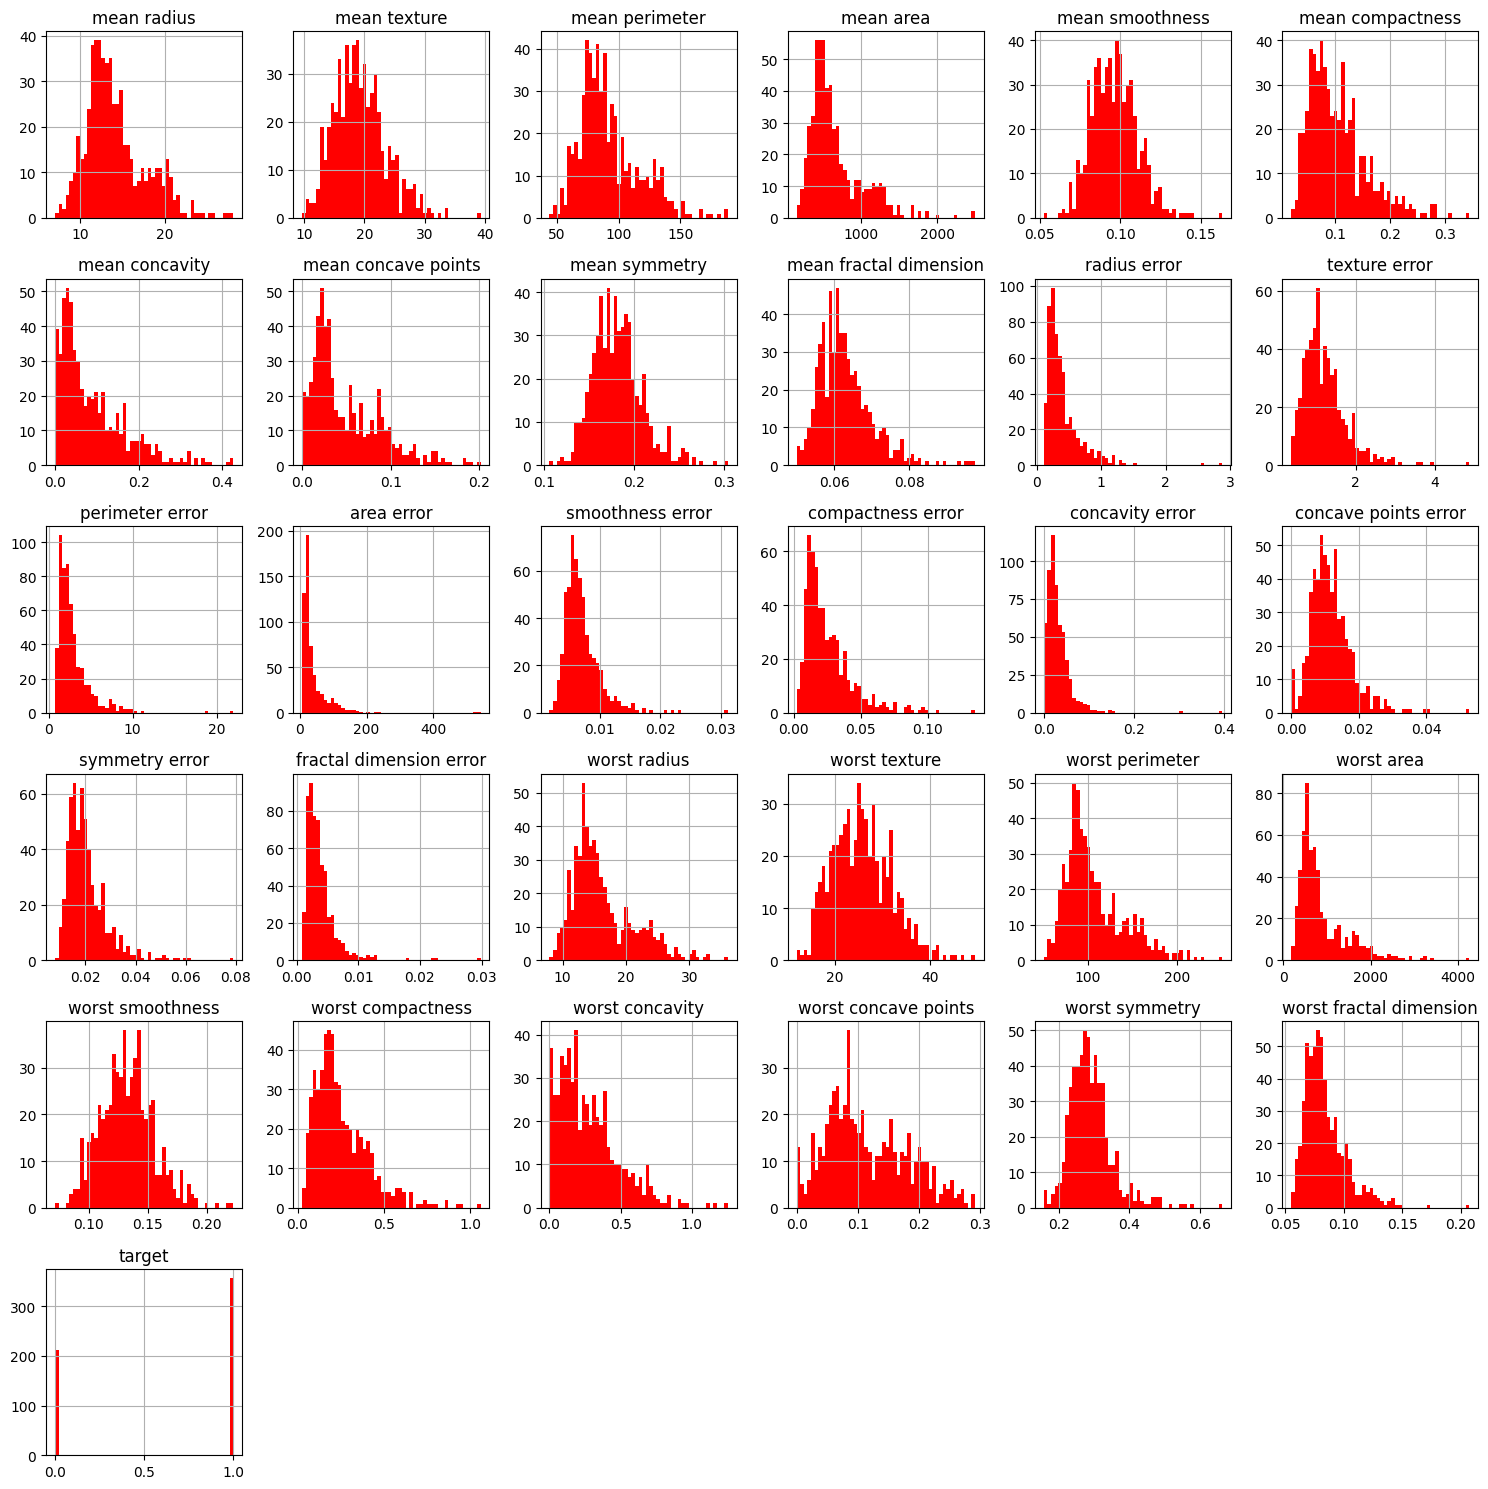

In [336]:
df.hist(figsize=(15,15), color="red", bins= 50);
plt.tight_layout()
plt.show()

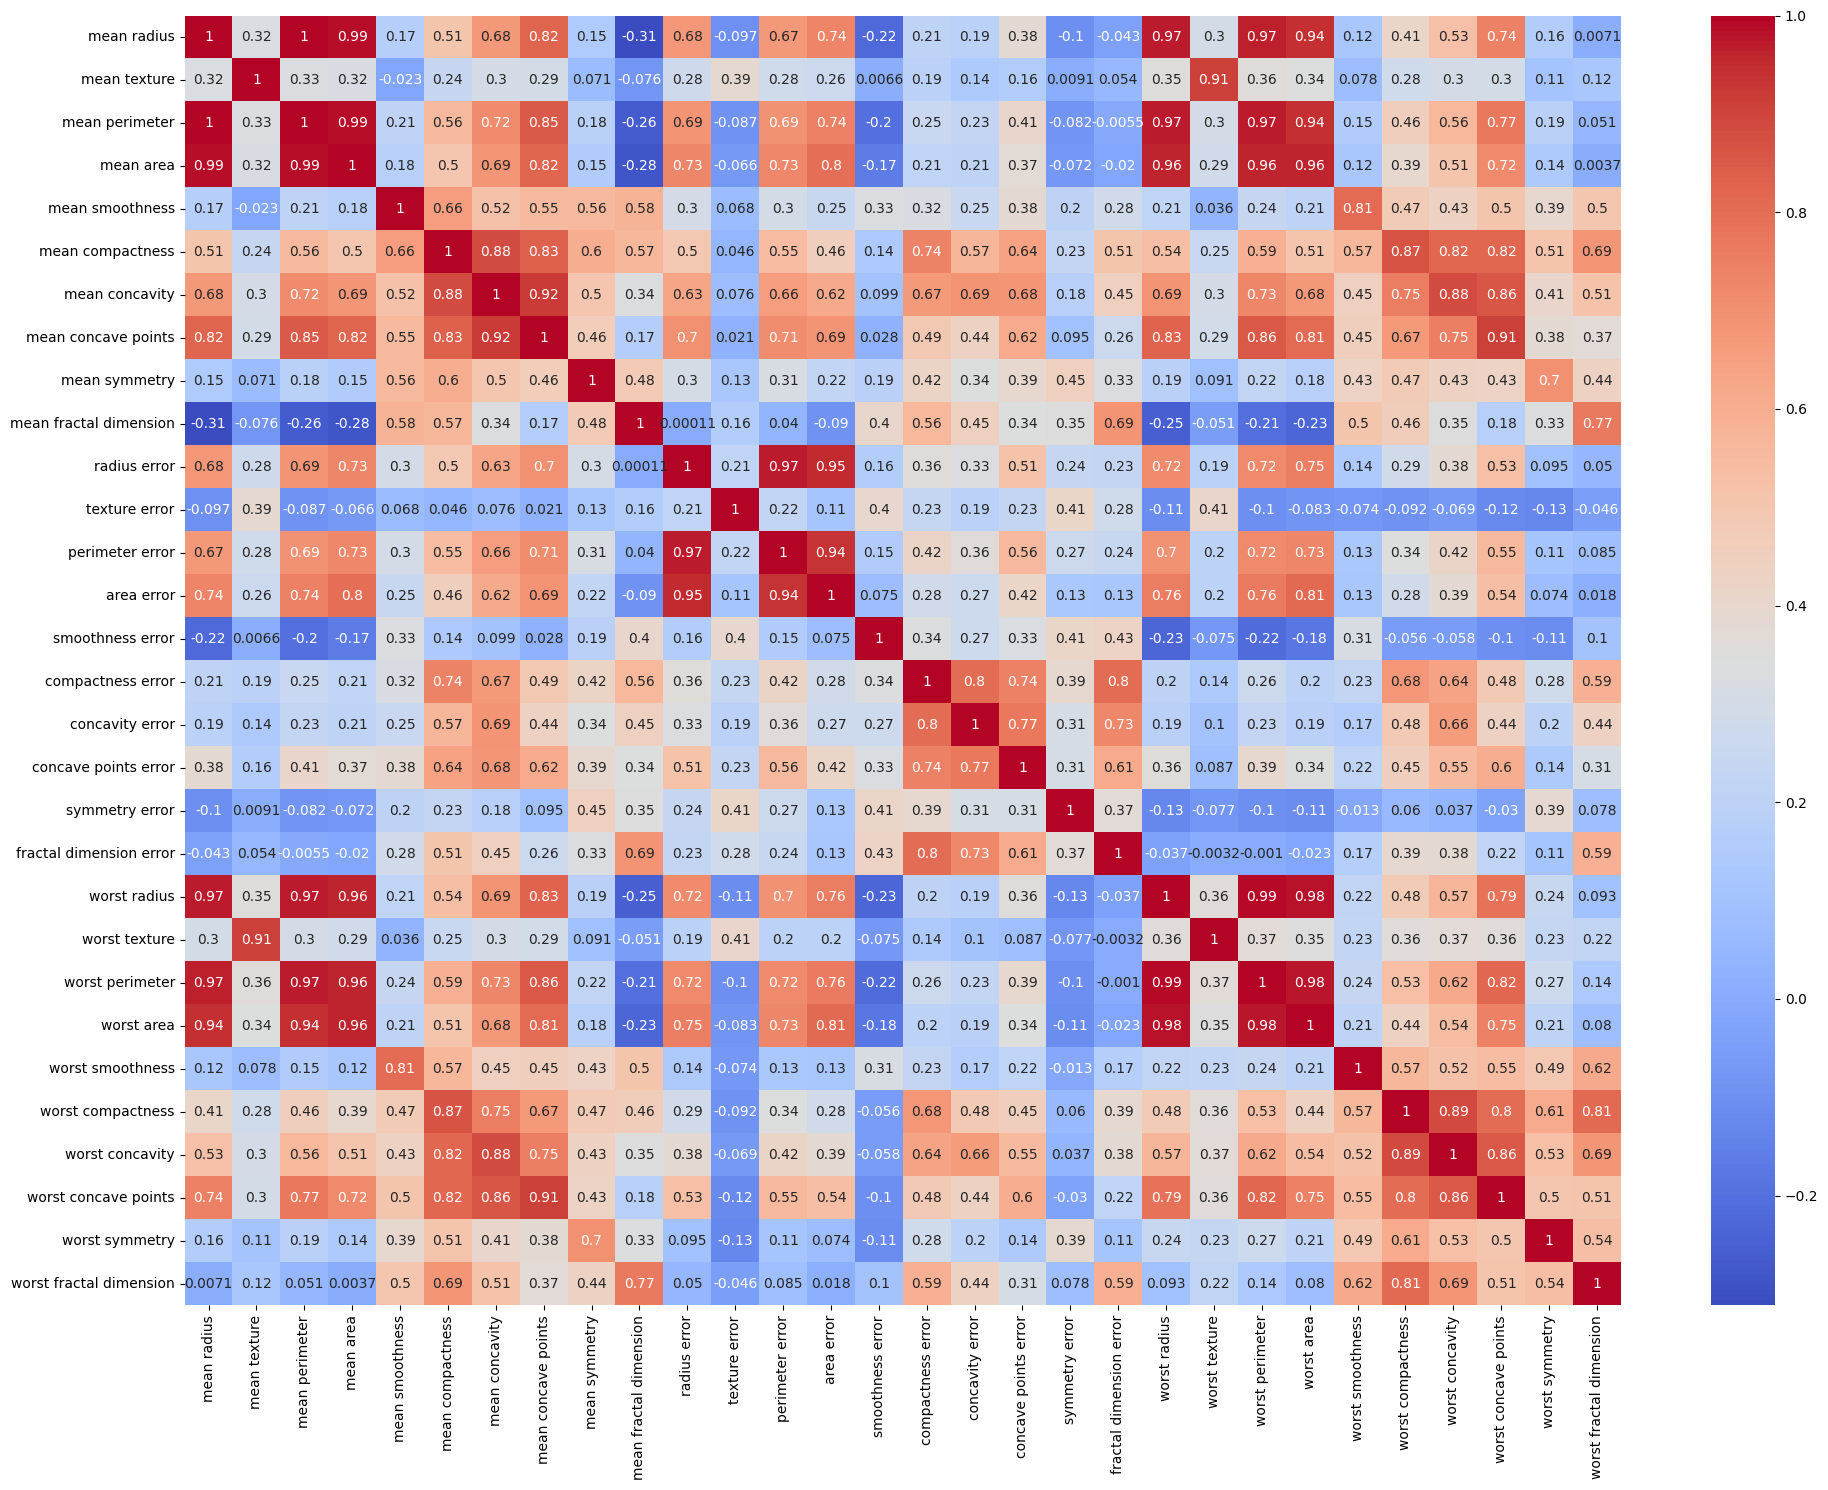

In [337]:
# Korelasyon matrisi ile özellikler arasındaki ilişkiler gösteriliyor
plt.figure(figsize=(20,15))
sns.heatmap(df.drop('target', axis=1).corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [338]:
# Özellikler ve hedef ayrılıyor
X = df.drop('target', axis=1)
y = df['target']

In [339]:
# PCA ile boyut indirgemesi yapılıyor
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

In [340]:
X.shape

(569, 30)

In [341]:
X_pca.shape

(569, 10)

In [342]:
# Veri seti eğitim ve test olmak üzere ikiye ayırılıyor
from sklearn.model_selection import train_test_split

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [343]:
# Ölçeklendirme yapılıyor
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_pca = scaler.fit_transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train_pca: ", X_train_pca.shape)
print("X_test_pca: ", X_test_pca.shape)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train_pca:  (398, 10)
X_test_pca:  (171, 10)
X_train:  (398, 30)
X_test:  (171, 30)


In [344]:
from sklearn.metrics import confusion_matrix, classification_report

* En yüksek başarı oranını veren k değeri için hem normal veride hem de PCA ile
boyut indirgemesi yapılan veride arama yapılıyor

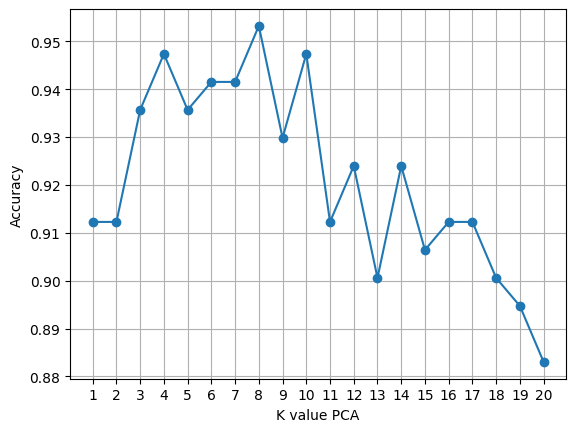

In [345]:
from sklearn.neighbors import KNeighborsClassifier

k_values = []
accuary_values = []
for k in range(1, 21):
  knn_pca = KNeighborsClassifier(n_neighbors=k, weights='distance')
  knn_pca.fit(X_train_pca, y_train_pca)
  pred = knn_pca.predict(X_test_pca)
  k_values.append(k)
  accuary_values.append(knn_pca.score(X_test_pca, y_test_pca))

plt.figure()
plt.plot(k_values, accuary_values, marker = "o", linestyle = "-")
plt.xticks(k_values)
plt.xlabel('K value PCA')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

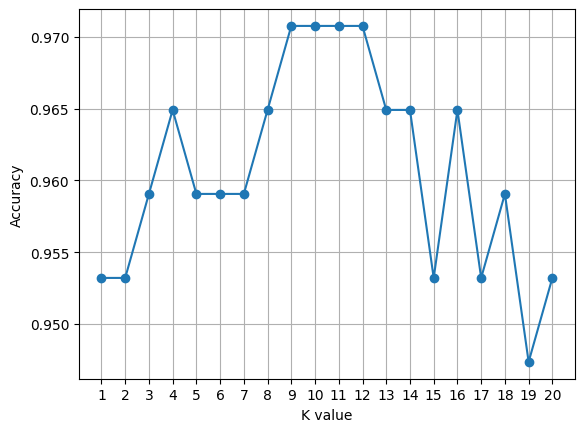

In [346]:
from sklearn.neighbors import KNeighborsClassifier

k_values = []
accuary_values = []
for k in range(1, 21):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  k_values.append(k)
  accuary_values.append(knn.score(X_test, y_test))

plt.figure()
plt.plot(k_values, accuary_values, marker = "o", linestyle = "-")
plt.xticks(k_values)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

* PCA ile çok yüksek oranda boyut indirgeme sağlandı ve başarı oranlarında büyük bir kayıp yaşanmadı. Geri kalan model eğitimlerinde boyutu indirgenmiş veri seti kullanılacak

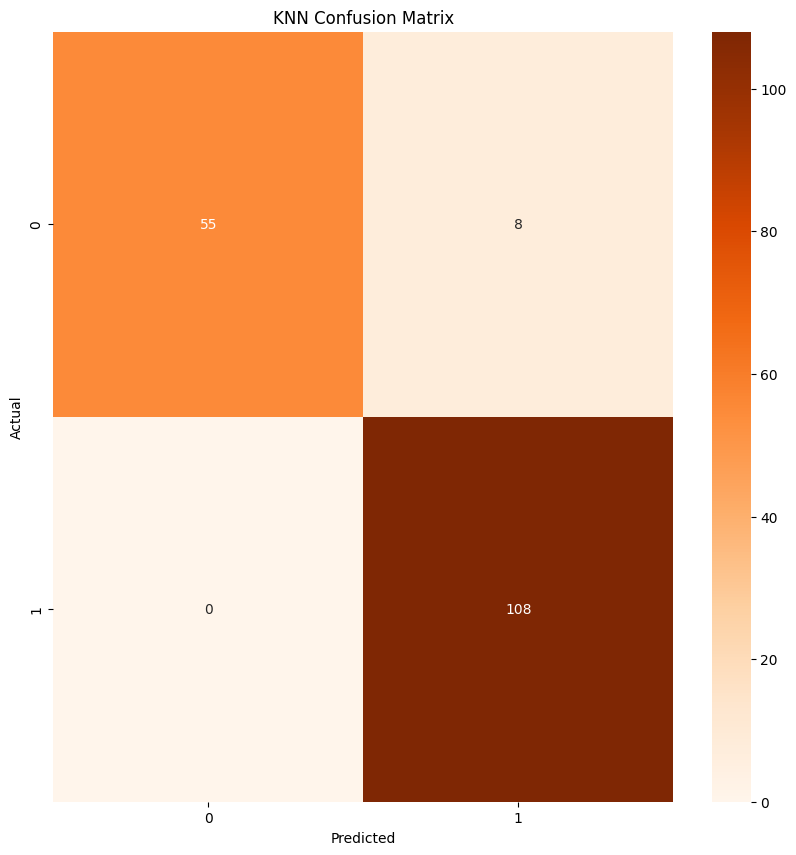

In [347]:
knn = KNeighborsClassifier(n_neighbors= 8, weights='distance')
knn.fit(X_train_pca, y_train_pca)
y_pred_knn = knn.predict(X_test_pca)
cm_knn = confusion_matrix(y_test_pca, y_pred_knn)

plt.figure(figsize=(10, 10))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap="Oranges")
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [348]:
cr_knn = classification_report(y_test_pca, y_pred_knn, zero_division=1)
print(cr_knn)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        63
           1       0.93      1.00      0.96       108

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



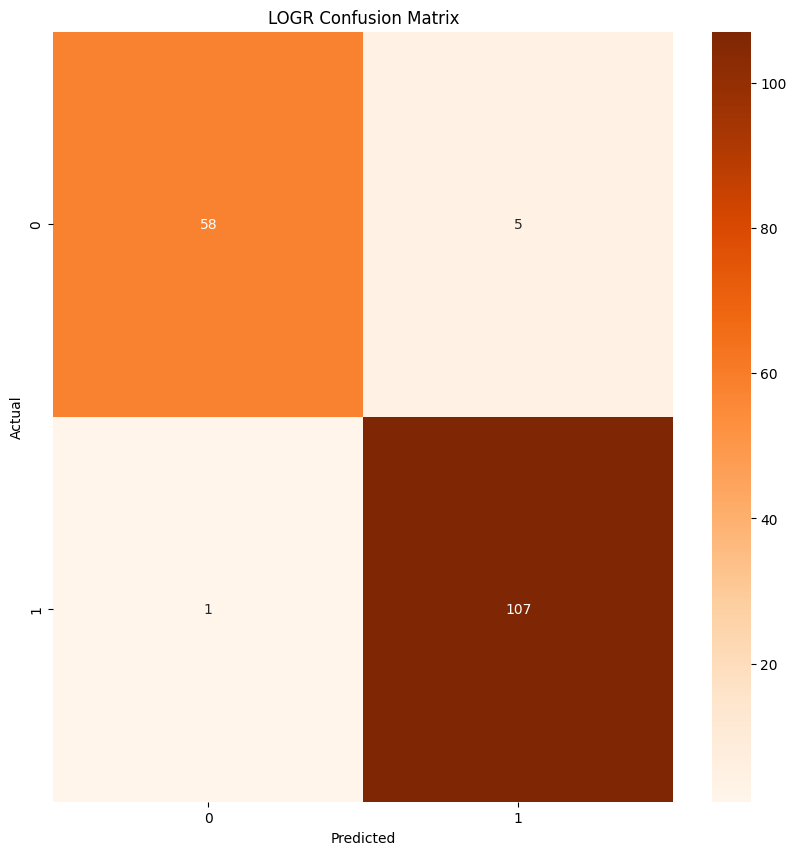

In [349]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=42)
logr.fit(X_train_pca, y_train_pca)
y_pred_logr = logr.predict(X_test_pca)
cm_logr = confusion_matrix(y_test_pca, y_pred_logr)

plt.figure(figsize=(10, 10))
sns.heatmap(cm_logr, annot=True, fmt='d', cmap="Oranges")
plt.title("LOGR Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [350]:
cr_knn = classification_report(y_test_pca, y_pred_logr, zero_division=1)
print(cr_knn)

              precision    recall  f1-score   support

           0       0.98      0.92      0.95        63
           1       0.96      0.99      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



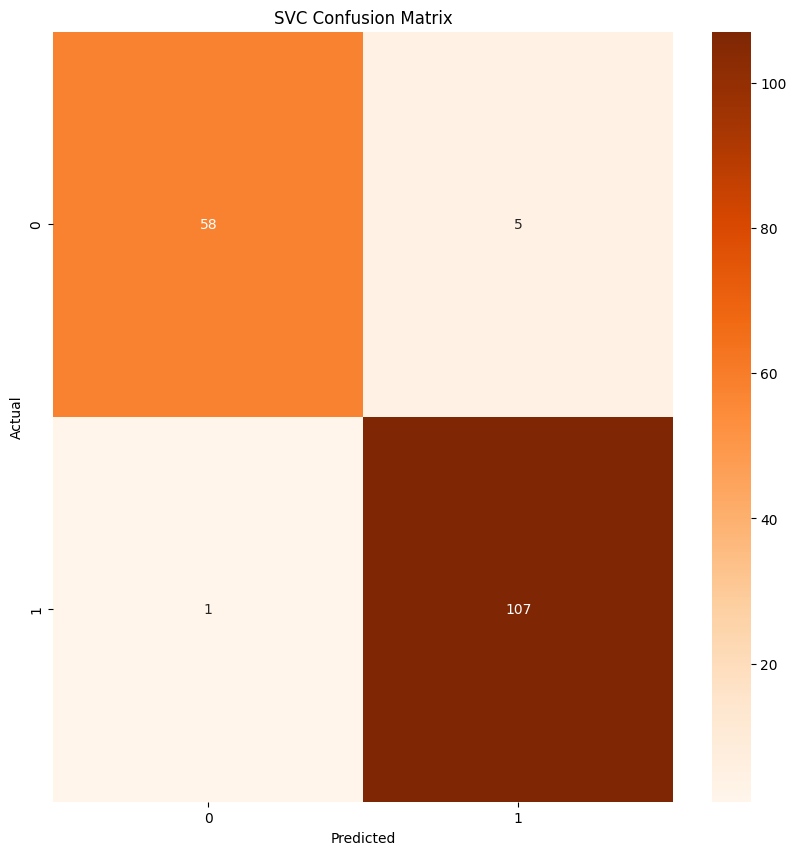

In [351]:
from sklearn.svm import SVC

svc = SVC(kernel= 'linear', random_state= 42)
svc.fit(X_train_pca, y_train_pca)
y_pred_svc = svc.predict(X_test_pca)
cm_svc = confusion_matrix(y_test_pca, y_pred_svc)

plt.figure(figsize=(10, 10))
sns.heatmap(cm_logr, annot=True, fmt='d', cmap="Oranges")
plt.title("SVC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [352]:
cr_svc = classification_report(y_test_pca, y_pred_svc, zero_division=1)
print(cr_svc)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



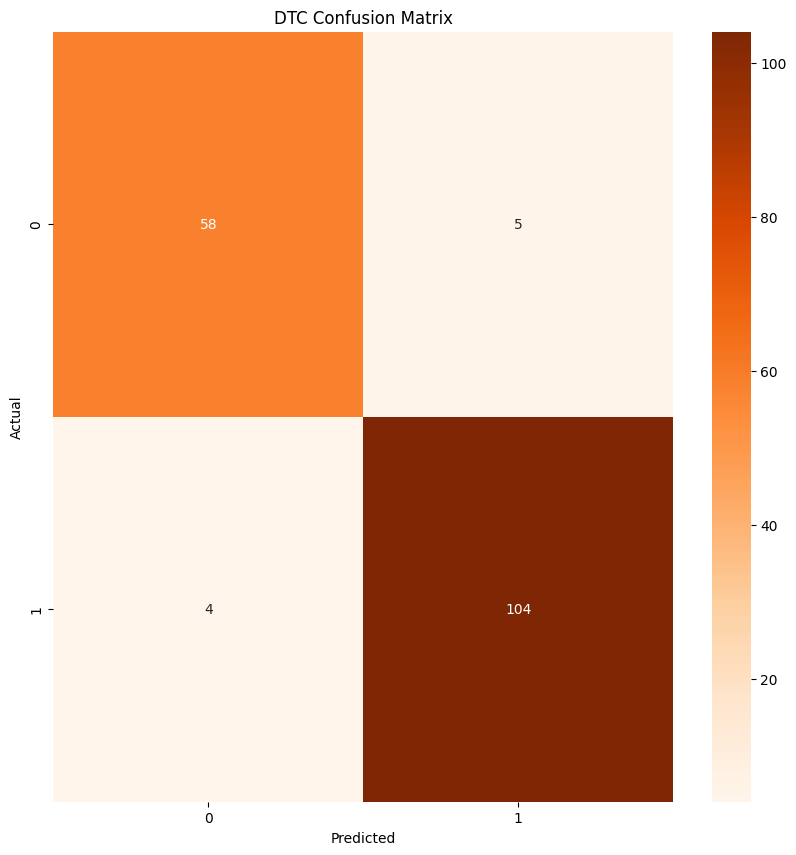

In [353]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=42)
dtc.fit(X_train_pca, y_train_pca)
y_pred_dtc = dtc.predict(X_test_pca)
cm_dtc = confusion_matrix(y_test_pca, y_pred_dtc)

plt.figure(figsize=(10, 10))
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap="Oranges")
plt.title("DTC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

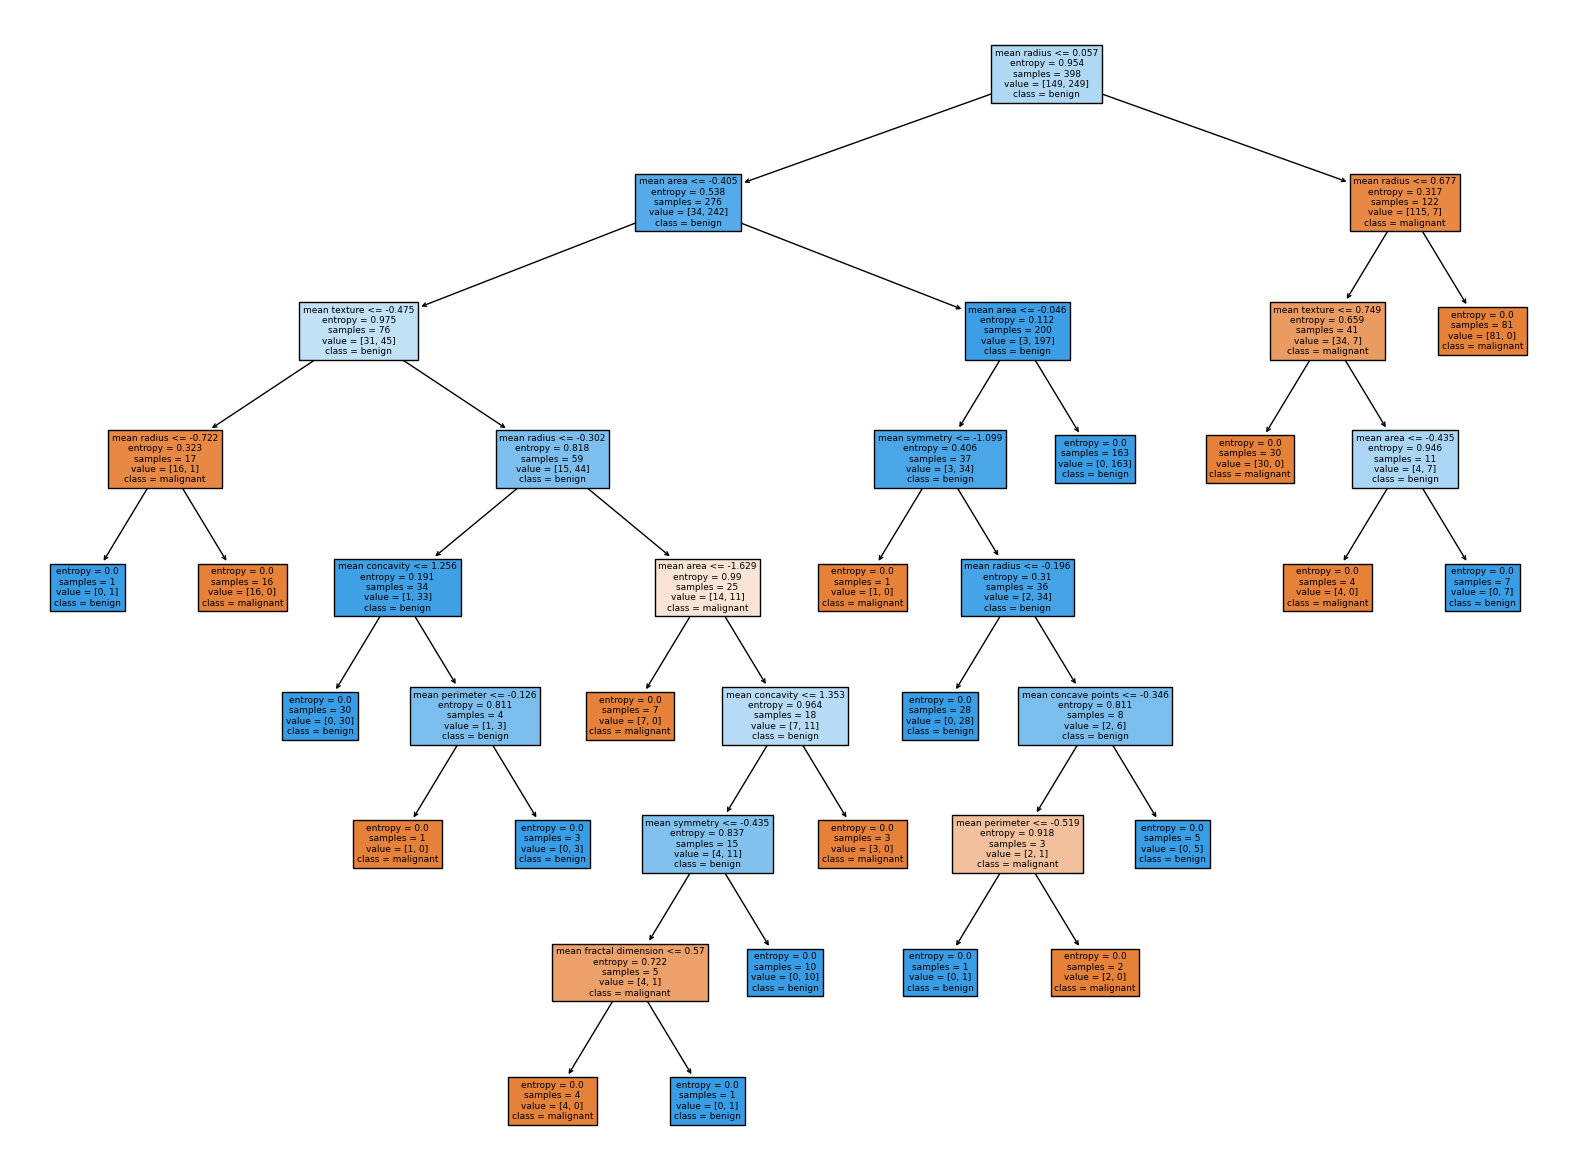

In [354]:
plt.figure(figsize = (20,15))
plot_tree(dtc, filled = True, feature_names = cancer.feature_names, class_names = list(cancer.target_names))
plt.show()

In [355]:
cr_dtc = classification_report(y_test_pca, y_pred_dtc, zero_division=1)
print(cr_dtc)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        63
           1       0.95      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



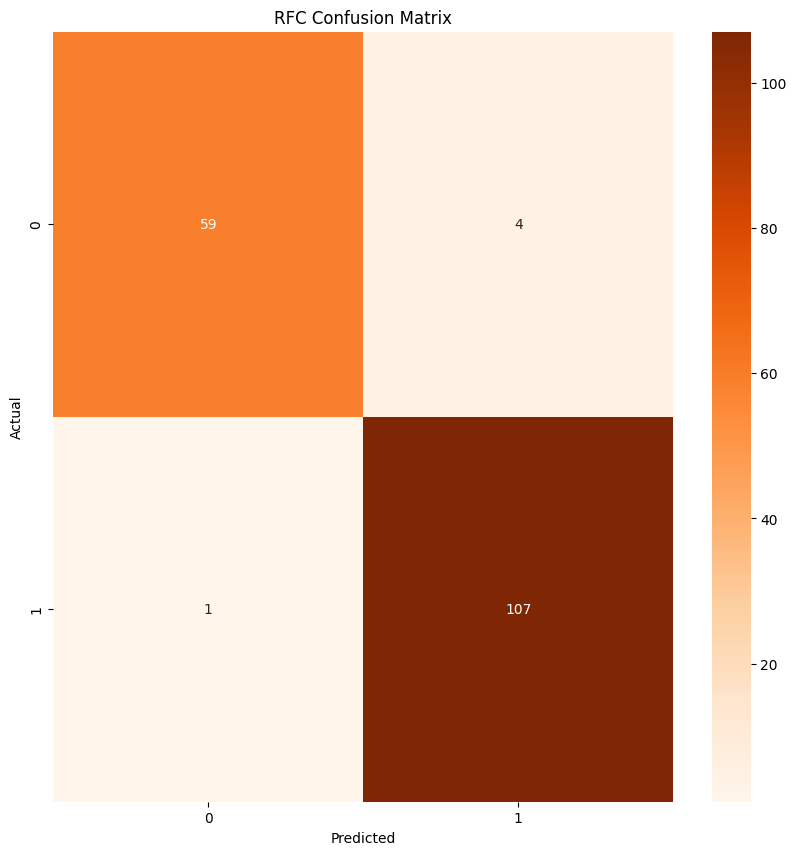

In [356]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators= 100, criterion='entropy', random_state=42)
rfc.fit(X_train_pca, y_train_pca)
y_pred_rfc = rfc.predict(X_test_pca)
cm_rfc = confusion_matrix(y_test_pca, y_pred_rfc)

plt.figure(figsize=(10, 10))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap="Oranges")
plt.title("RFC Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [357]:
cr_rfc = classification_report(y_test_pca, y_pred_rfc, zero_division=1)
print(cr_rfc)

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



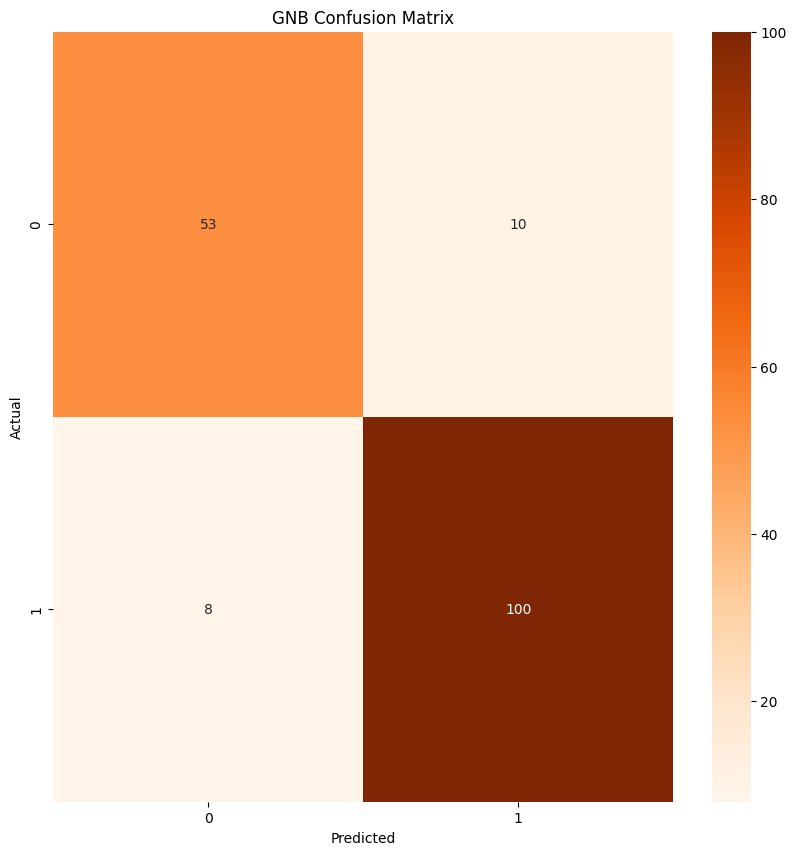

In [358]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_pca, y_train_pca)
y_pred_gnb = gnb.predict(X_test_pca)
cm_gnb = confusion_matrix(y_test_pca, y_pred_gnb)

plt.figure(figsize=(10, 10))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap="Oranges")
plt.title("GNB Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [359]:
cr_gnb = classification_report(y_test_pca, y_pred_gnb, zero_division=1)
print(cr_gnb)

              precision    recall  f1-score   support

           0       0.87      0.84      0.85        63
           1       0.91      0.93      0.92       108

    accuracy                           0.89       171
   macro avg       0.89      0.88      0.89       171
weighted avg       0.89      0.89      0.89       171



# GridSearch ve RandomSearch ile HyperParameter Tuning

In [360]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [361]:
dtc_param_grid = {"criterion": ["gini", "entropy"],
                  "max_depth": [3, 4, 5, 6, 7, 8, 9],
                  "max_leaf_nodes": [None, 5, 10, 20, 30, 50, 100],
                  "min_samples_split": [2, 5, 10, 15, 20],
                  "min_samples_leaf": [1, 2, 3, 4, 5],
                  }

In [362]:
dtc = DecisionTreeClassifier(random_state=42)

In [363]:
dtc_grid = GridSearchCV(dtc, dtc_param_grid, cv=5, n_jobs=-1, verbose=0)
dtc_grid.fit(X_train, y_train)

print("DTC Best Parameters: ", dtc_grid.best_params_)
print("DTC Best Accuary: ", dtc_grid.best_score_)

DTC Best Parameters:  {'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DTC Best Accuary:  0.944746835443038


In [364]:
dtc_random = RandomizedSearchCV(dtc, dtc_param_grid, cv=5, n_jobs=-1, verbose=0, n_iter=20)
dtc_random.fit(X_train, y_train)

print("DTC Best Parameters: ", dtc_random.best_params_)
print("DTC Best Accuary: ", dtc_random.best_score_)

DTC Best Parameters:  {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_leaf_nodes': 100, 'max_depth': 3, 'criterion': 'entropy'}
DTC Best Accuary:  0.9422468354430379


* RandomSearch yöntemi ile daha hızlı bir şekilde en iyi sonuca ulaşılmasa bile çok daha hızlı bir arama gerçekleşiyor. GridSearch tüm olasıkları hesapladığı için çalışma zamanı biraz daha yüksek.